## Data Visualisation Techniques  

#### Exploratory Data Analysis (EDA)

Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data import

In [4]:
df = pd.read_csv('vgsales.csv')

In [ ]:
df.head()

In [5]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [6]:
percentage_missing = (missing_values / len(df)) * 100
print("\nPercentage of missing values:\n", percentage_missing)


Percentage of missing values:
 Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (16719, 16)


Analyzing Distributions and Relationships

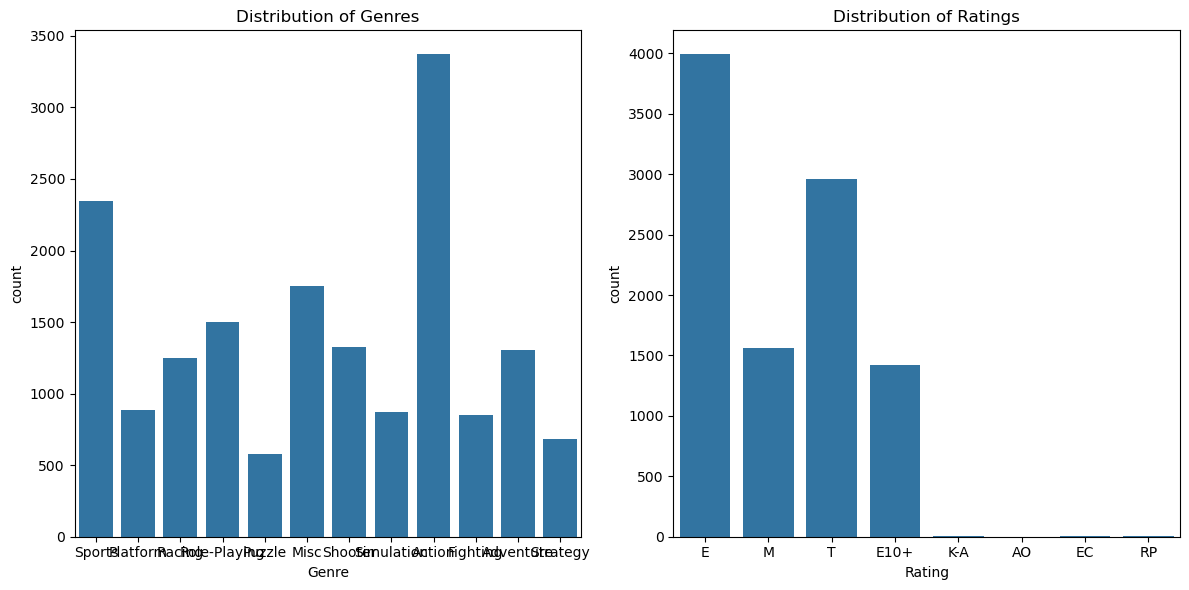

In [10]:
# Distribution of categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Genre', data=df)
plt.title('Distribution of Genres')

plt.subplot(1, 2, 2)
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')

plt.tight_layout()
plt.show()

#### Part 1

• What are the top 5 games by global sales?

In [11]:
top_5_games = df.sort_values(by='Global_Sales', ascending=False).head(5)

# Display the top 5 games by global sales
print("Top 5 games by global sales:")
print(top_5_games[['Name', 'Global_Sales']])

Top 5 games by global sales:
                       Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_25772\2951928128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')


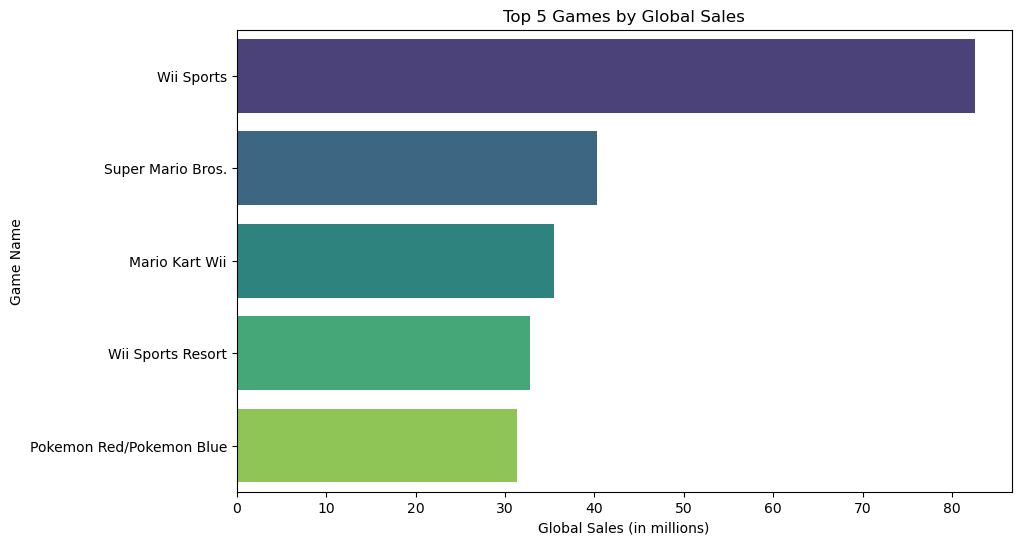

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')
plt.title('Top 5 Games by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.show()

#### Part 2